In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# # Read the City and Ride Data
CityData = pd.read_csv("city_data.csv")
RideData = pd.read_csv("ride_data.csv")
RideData.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
#Validating data in Ride Date to make sure there are no duplicate rows, using city+date+fare+ride_id as unique ID
RGroup = RideData.groupby(['city']+['date']+['fare']+['ride_id'])
a = int(len(RGroup)) 
b = int(len(RideData))

if a == b:
    print ('no need to consolidate RideData')
else:
    RideData = RideData.drop.duplicates()
    
#Validating data in City Date to make sure there are no duplicate rows, using city as unique ID (known Type has unique value)
c = CityData['city'].nunique()
d = CityData['city'].count()
    
if c == d:
    print ('no need to consolidate CityData')
    
#If any City has more than one row of data, combine the driver_count so that each city only has one driver count
#known Type has unique value
else:
    CGroup = CityData.groupby(['city']+['type'])
    CityData = CGroup['driver_count'].sum()
    CityData = CityData.reset_index()
    e = CityData['city'].count()
    print ('CityData consolidated from '+str(d)+' to ' +str(e))

no need to consolidate RideData
no need to consolidate CityData


In [3]:
# pull the Type and Driver_Count to the RideData from CityData
CityRide = pd.merge(RideData,CityData,how='left',on='city')
#CityRide.head()

# calculate variables that will be used in the graph
GCityRide = CityRide.groupby(['city']+['type']+['driver_count'])
#GCityRide

# calculate Average fare($) Per City
Ave_Fare = GCityRide['fare'].mean()

# calculate Total Number of Rides Per City
Total_Rides = GCityRide['ride_id'].count()

df = pd.DataFrame({"AveFare":Ave_Fare, "TotalRides":Total_Rides})
df = df.reset_index()

## Bubble Plot of Ride Sharing Data

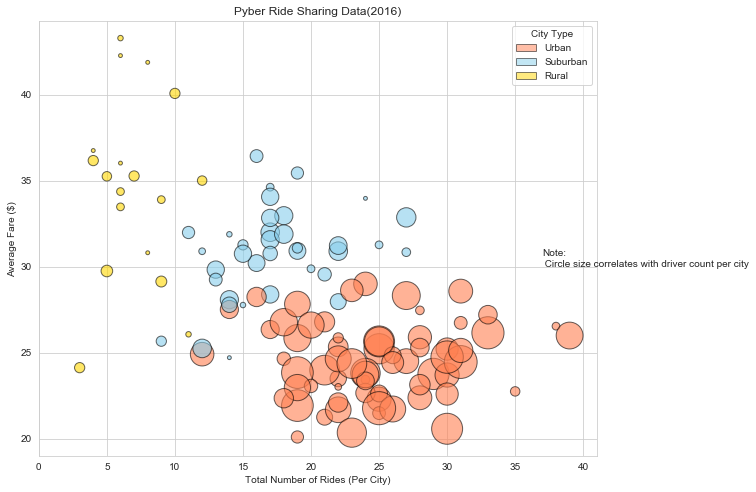

In [7]:
# set colors for city types
colors = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}

# update legend
import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="Coral",alpha=.5,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="SkyBlue",alpha=.5,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="Gold",alpha=.5,edgecolor="black", linewidth=1)

# Draw Bubble Chart
sns.set_style("whitegrid") 
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['TotalRides'], df['AveFare'], s=df['driver_count']*15, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

# Set x and y limits
ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(19, max(df['AveFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")
ax.text(37,30,'Note:\n Circle size correlates with driver count per city')

#save graph
plt.savefig("analysis/bubble_chart.png")

#save graph
plt.show()

## Total Fares by City Type

In [8]:
# calculate variables that will be used in the Pie Chart
GType = CityRide.groupby(['type'])
GGType = CityData.groupby(['type'])

# Calculate Total fare Per CityType
TFare = GType['fare'].sum()

# Calculate Total Rides Per CityType
TRides = GType['ride_id'].count()

# Calculate Total Drivers Per CityType
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
#df1

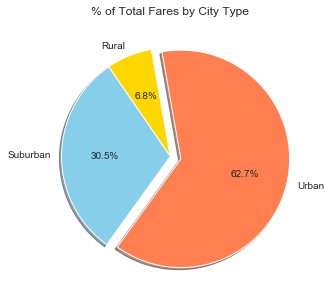

In [9]:
# Plot % of Fares by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalFare']

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "Coral"]

# Tells matplotlib to seperate the sections from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Fares by City Type")

#save graph
plt.savefig("analysis/total_fares.png", bbox_inches='tight')

# Prints our pie chart to the screen
plt.show()

## Total Rides by City Type

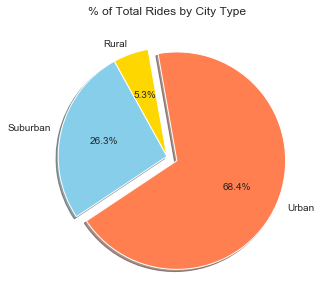

In [10]:
# Plot % of Total Rides by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalRides']

# The colors of each section of the pie chart
colors = ["Gold", "SkyBlue", "Coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Rides by City Type")

#save graph
plt.savefig("analysis/total_rides.png", bbox_inches='tight')

# Prints our pie chart to the screen
plt.show()

## Total Drivers by City Type

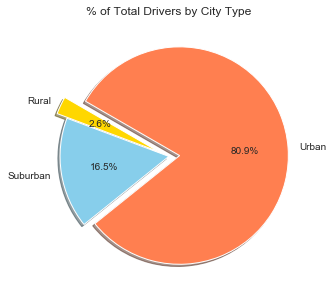

In [11]:
# Plot % of Total Drivers by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalDrivers']

# define colors
colors = ["Gold", "SkyBlue", "Coral"]

# seperate the section from the others
explode = (0.1, 0, 0.1)

# Creates the pie chart based upon the values above 
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
            
# Update Title
plt.title("% of Total Drivers by City Type")


#save graph
plt.savefig("analysis/total_drivers.png", bbox_inches='tight')

# Prints our pie chart to the screen
plt.show()